## The Change in Price of the Stock Overtime

handle requesting stock information with pandas and analyze basic attributes of a stock

In [1]:
import os 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns #数据可视化
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# for time stamps
from datetime import datetime

# set up end and start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# 以下列表元素按顺序对应
csv_list = ['000858.SZ.csv', '000568.SZ.csv', '002304.SZ.csv', '000596.SZ.csv']
stock_name = ["五粮液", "泸州老窖", "洋河股份","古井贡酒"]

# 创建一个对应多维空集
array = np.empty(len(stock_name), object)

# 批量读取股票数据至同一个多维array（维度是股票数量单位）
for i in range(len(stock_name)):
    path = os.path.join('C:\\Users\\jim_c\\Desktop\\Task\\local_base\\stock_data', csv_list[i])
    array[i] = pd.DataFrame(pd.read_csv(path))
    array[i].columns=["date", "ts_code", "open", "high", "low", "close", "pre_close", "vol", "amount", "turn", "paused", "pct_chg", "isST"]
    #array[i]=pd.DataFrame(data=array[i], columns=columns)

# 以下字典元素按顺序对应
stock_dict = {'WLY' : ("五粮液", array[0]),
              'LZLJ' : ("泸州老窖", array[1]),
              'YHGF' : ("洋河股份", array[2]),
              'GJGJ' : ("古井贡酒", array[3])}

- 股票数据索引格式：stock_dict['XXXX'][1] ('XXXX' 为首拼缩写)
- 一年250个交易日，设置时间长度【n_day = XXX】:
    数据索引格式：stock_dict['XXXX'][1][:n_day - 1]

##### （以下研究时间线长度均默认设置为【n_day = 1】）

In [2]:
# for example:

n_day = 250

stock_dict['GJGJ'][1][:n_day - 1]

,date,ts_code,open,high,low,close,pre_close,vol,amount,turn,paused,pct_chg,isST
0,2023-03-13,sz.000596,271.550000,282.900000,269.640000,280.400000,271.550000,1502835,4.182728e+08,0.3678,0,3.2591,0
1,2023-03-10,sz.000596,269.000000,275.450000,268.000000,271.550000,272.280000,1124048,3.056653e+08,0.2751,0,-0.2681,0
2,2023-03-09,sz.000596,267.710000,276.500000,267.710000,272.280000,267.560000,1521866,4.142701e+08,0.3725,0,1.7641,0
3,2023-03-08,sz.000596,270.150000,271.680000,265.800000,267.560000,272.590000,1056207,2.830706e+08,0.2585,0,-1.8453,0
4,2023-03-07,sz.000596,276.490000,279.490000,271.100000,272.590000,276.900000,1035233,2.848993e+08,0.2534,0,-1.5565,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2022-03-10,sz.000596,201.197667,202.484857,196.286543,199.039149,195.355806,3023199,6.088008e+08,0.7399,0,1.8855,0
245,2022-03-09,sz.000596,199.583729,202.049193,188.117839,195.355806,199.355996,3131493,6.190569e+08,0.7664,0,-2.0066,0
246,2022-03-08,sz.000596,206.435540,211.802131,199.019346,199.355996,204.029485,2426547,4.999400e+08,0.5939,0,-2.2906,0
247,2022-03-07,sz.000596,211.871441,211.871441,202.979930,204.029485,212.188288,3309383,6.878760e+08,0.8099,0,-3.8451,0


##### Descriptive Statistics about the Data

In [3]:
# summary stats
stock_dict['GJGJ'][1][:n_day - 1].describe()

,open,high,low,close,pre_close,vol,amount,turn,paused,pct_chg,isST
count,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02,2.490000e+02,249.000000,249.0,249.000000,249.0
mean,236.238599,241.411466,232.019898,236.855895,236.566842,2.240174e+06,5.172739e+08,0.548258,0.0,0.153192,0.0
std,34.292089,34.365566,34.185758,34.233805,34.168453,1.084629e+06,2.339968e+08,0.265452,0.0,2.622222,0.0
min,162.591875,168.800090,158.987743,162.443353,162.443353,7.667540e+05,1.878482e+08,0.187700,0.0,-9.235900,0.0
25%,210.000000,213.450000,205.050000,210.544645,210.500000,1.442806e+06,3.485044e+08,0.353100,0.0,-1.325500,0.0
50%,238.000000,244.990000,234.300000,238.400000,238.400000,2.030409e+06,4.731758e+08,0.496900,0.0,-0.082500,0.0
75%,262.990000,268.460000,259.000000,263.820000,263.560000,2.773579e+06,6.243315e+08,0.678800,0.0,1.474800,0.0
max,300.000000,308.000000,297.000000,301.000000,301.000000,9.143150e+06,2.276829e+09,2.237700,0.0,10.001500,0.0


##### Information about the Data

In [4]:
# general info
stock_dict['GJGJ'][1][:n_day - 1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       249 non-null    object 
 1   ts_code    249 non-null    object 
 2   open       249 non-null    float64
 3   high       249 non-null    float64
 4   low        249 non-null    float64
 5   close      249 non-null    float64
 6   pre_close  249 non-null    float64
 7   vol        249 non-null    int64  
 8   amount     249 non-null    float64
 9   turn       249 non-null    float64
 10  paused     249 non-null    int64  
 11  pct_chg    249 non-null    float64
 12  isST       249 non-null    int64  
dtypes: float64(8), int64(3), object(2)
memory usage: 25.4+ KB


##### Closing Price

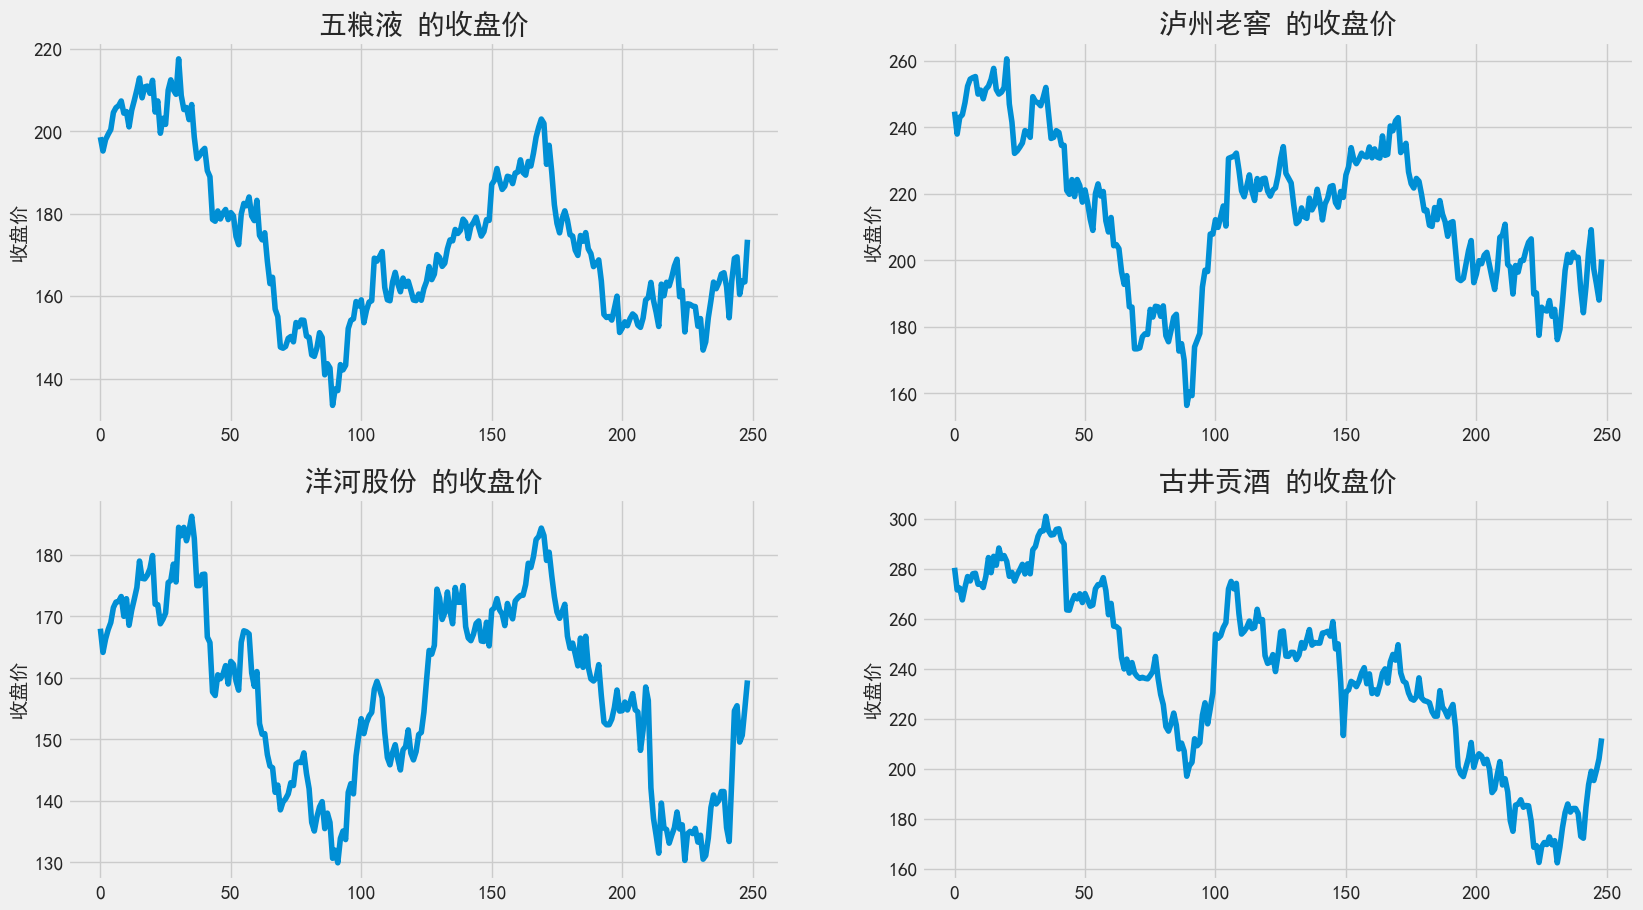

In [5]:
# historical view of the closing price

#-*- coding: utf-8 -*-
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

plt.rcParams['figure.figsize']=(18, 16)

plot_row = int(len(stock_name)/2) + 1
plot_col = 2
plot_num_count = 1

for value in stock_dict:
    plt.subplot(plot_row, plot_col, plot_num_count)
    stock_dict[value][1][:n_day - 1]['close'].plot()
    plt.ylabel('收盘价')
    plt.xlabel(None)
    plt.title(f"{stock_dict[value][0]} 的收盘价")
    plot_num_count+=1
plt.show()

## The Moving Average of the Various Stocks

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

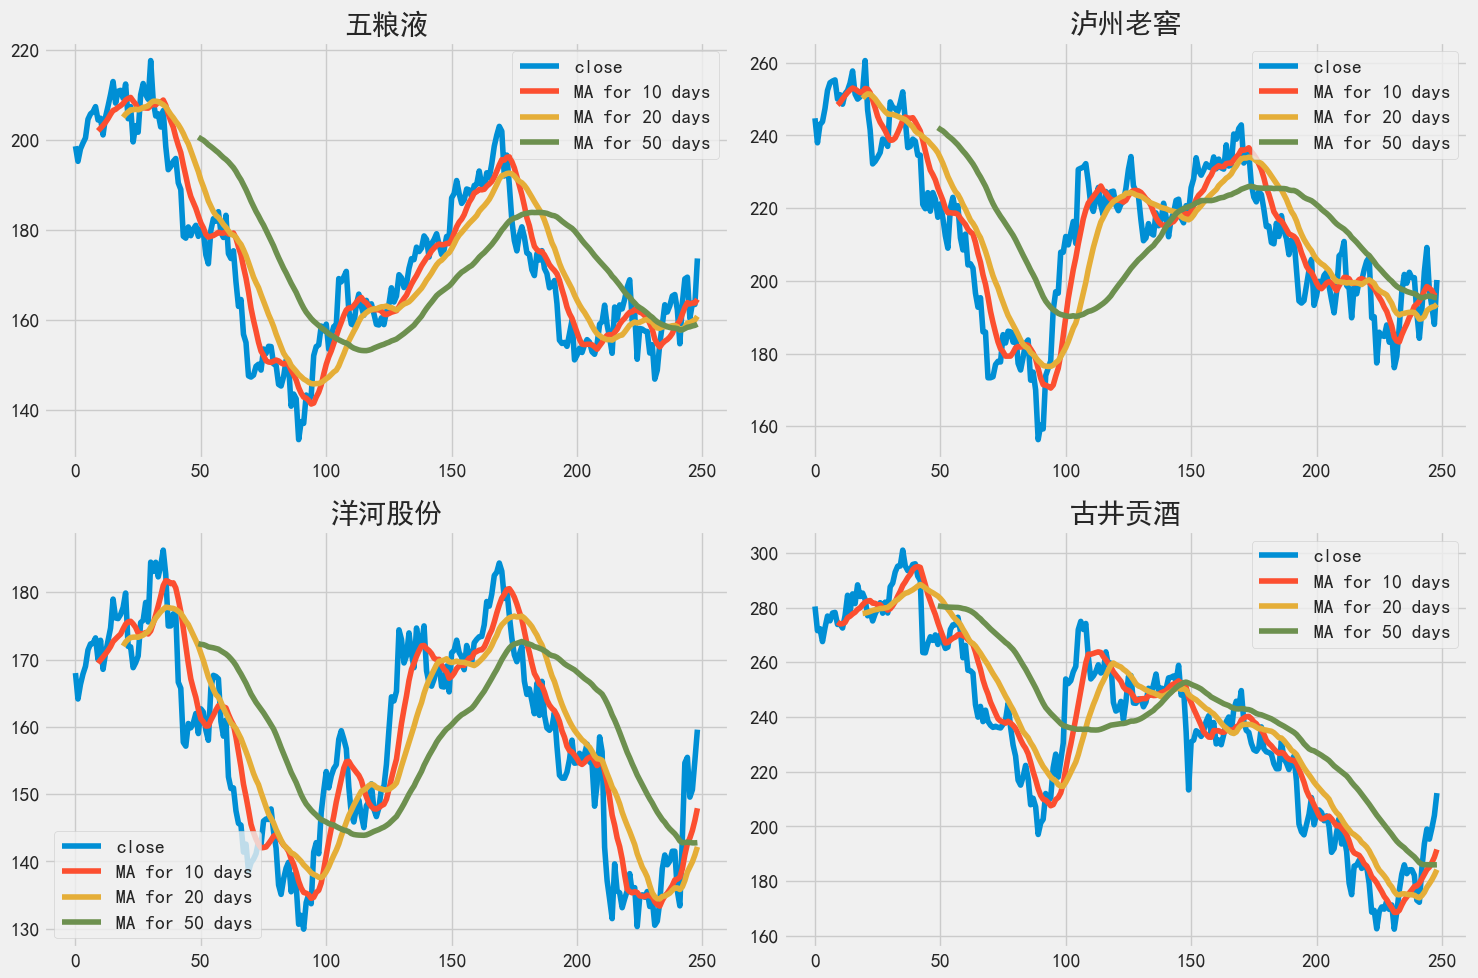

In [6]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for value in stock_dict:
        column_name = f"MA for {ma} days"
        stock_dict[value][1][column_name] = stock_dict[value][1]['close'].rolling(ma).mean()
        
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

stock_dict['WLY'][1][:n_day - 1][['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('五粮液')

stock_dict['LZLJ'][1][:n_day - 1][['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('泸州老窖')

stock_dict['YHGF'][1][:n_day - 1][['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('洋河股份')

stock_dict['GJGJ'][1][:n_day - 1][['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('古井贡酒')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

## The Daily Return of the Stock on Average

To analyze the risk of the stock,use pandas to retrieve teh daily returns

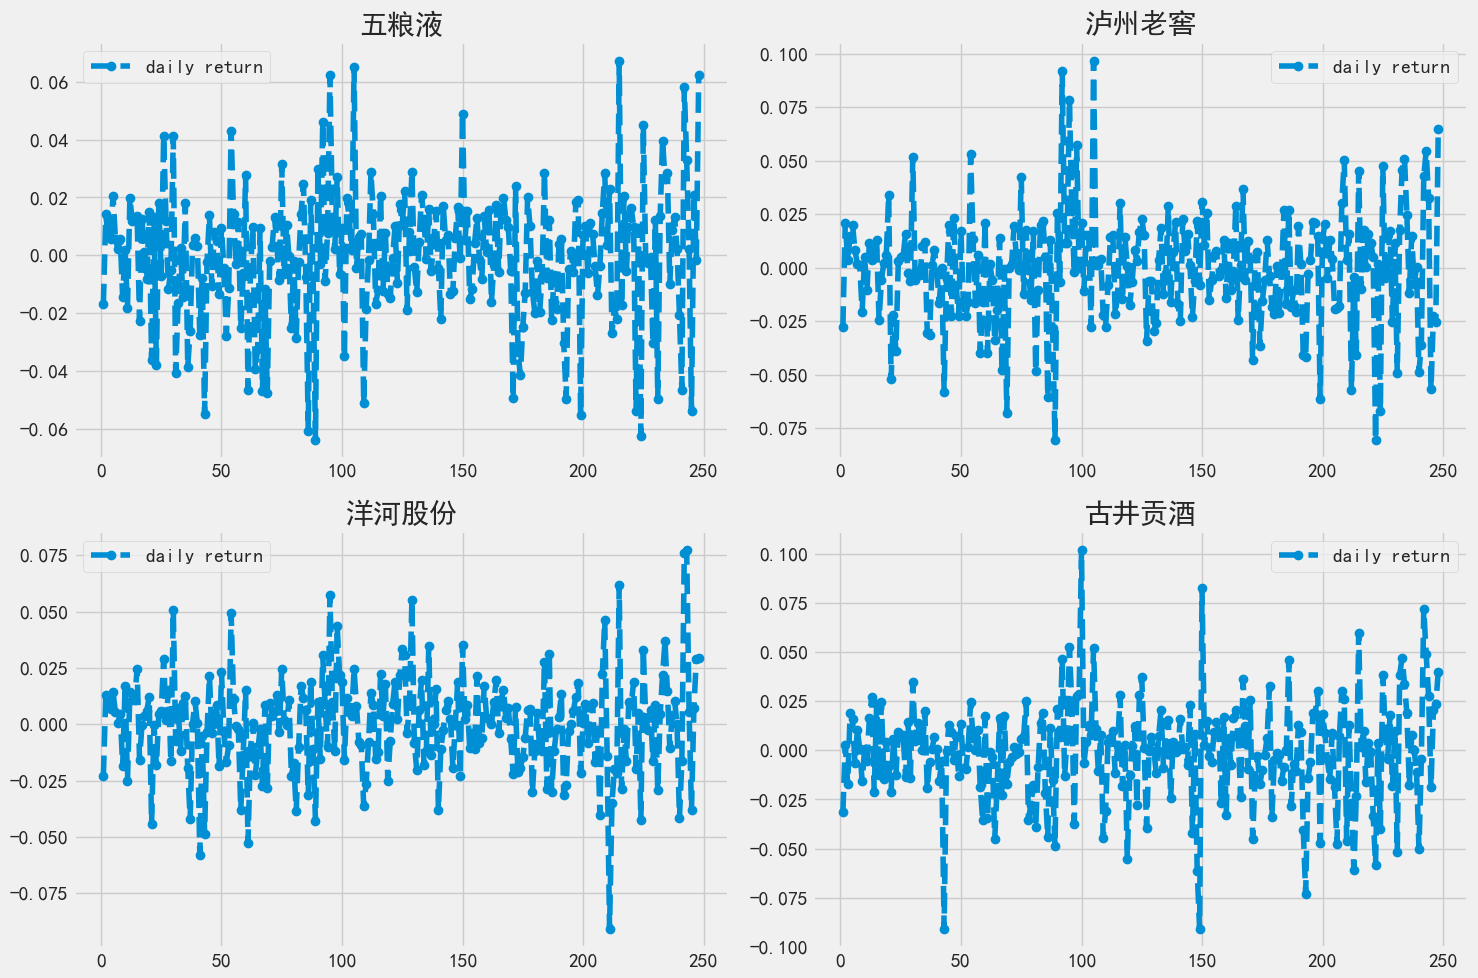

In [7]:
# use pct_change to find the percent change for each day
for value in stock_dict:
    stock_dict[value][1]['daily return'] = stock_dict[value][1]['close'].pct_change()
    
# plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

stock_dict['WLY'][1][:n_day - 1][['daily return']].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('五粮液')

stock_dict['LZLJ'][1][:n_day - 1][['daily return']].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('泸州老窖')

stock_dict['YHGF'][1][:n_day - 1][['daily return']].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('洋河股份')

stock_dict['GJGJ'][1][:n_day - 1][['daily return']].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('古井贡酒')

fig.tight_layout()

The average daily return using histogram, use seaborn to create both a histogram and kde plot on the same figure

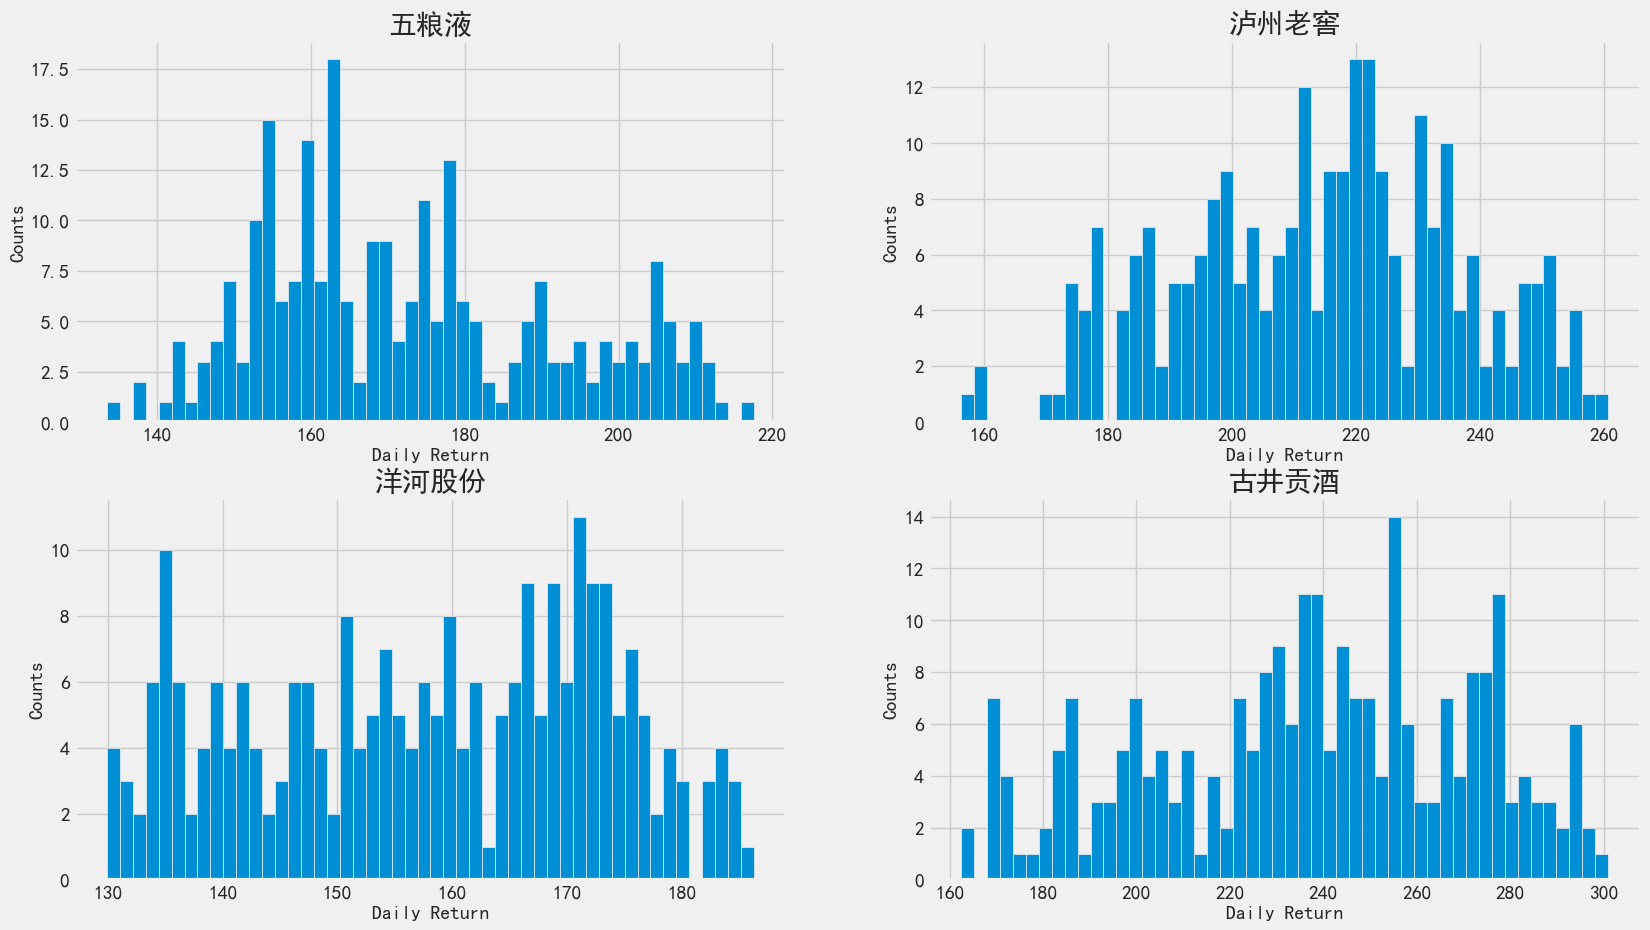

In [8]:
plt.rcParams['figure.figsize']=(18, 16)

plot_row = int(len(stock_name)/2) + 1
plot_col = 2
plot_num_count = 1

for value in stock_dict:
    plt.subplot(plot_row, plot_col, plot_num_count)
    stock_dict[value][1][:n_day - 1]['close'].hist(bins=50)
    plt.ylabel('Counts')
    plt.xlabel('Daily Return')
    plt.title(f"{stock_dict[value][0]}")
    plot_num_count+=1
plt.show()

## The Correlation between Different Stocks Closing Prices

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

In [9]:
# grab all the closing prices for the stock into one dataframe
close_df = pd.DataFrame()

for value in stock_dict:
    for i in range(len(stock_name)):
        column_name = f"{stock_dict[value][0]}"
        close_df[column_name] = stock_dict[value][1]['close']

close_df = pd.DataFrame(close_df)
close_df = close_df[:n_day -1]

# make a new daily returns dataframe
daily_rets = close_df.pct_change()
daily_rets.head()

,五粮液,泸州老窖,洋河股份,古井贡酒
0,NaN,NaN,NaN,NaN
1,-0.016918,-0.027581,-0.022976,-0.031562
2,0.014136,0.021010,0.013220,0.002688
3,0.006566,0.003375,0.009320,-0.017335
4,0.005770,0.014766,0.006791,0.018800


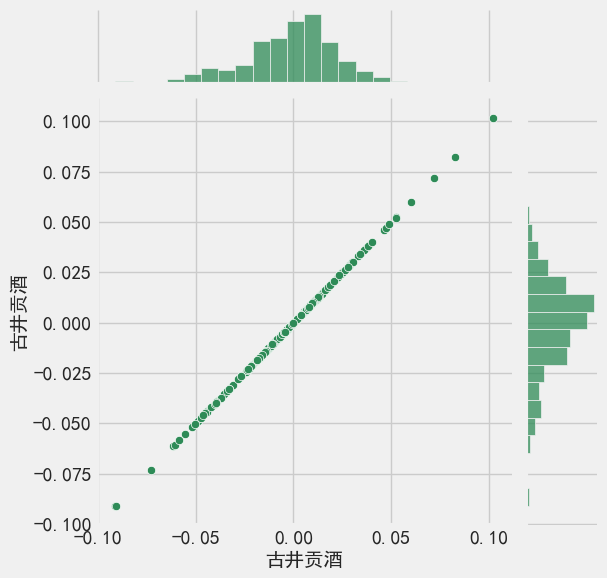

In [10]:
# compare any stock itself should show a pefectly linear relationship

sns.jointplot(x='古井贡酒', y='古井贡酒', data=daily_rets, kind='scatter', color='seagreen')

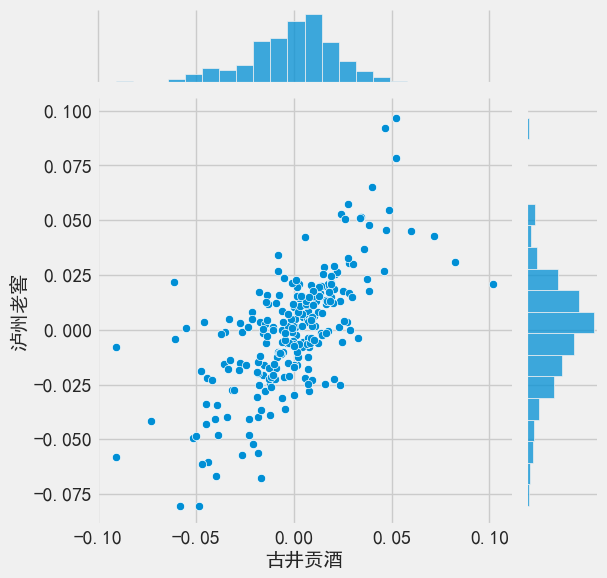

In [11]:
# use joinplot to compare the daily returns of 古井贡酒 and 泸州老窖
sns.jointplot(x='古井贡酒', y='泸州老窖', data=daily_rets, kind='scatter')

if two stocks are perfectly (and positively) correlated with each other a linear relationship between its daily return values should occr

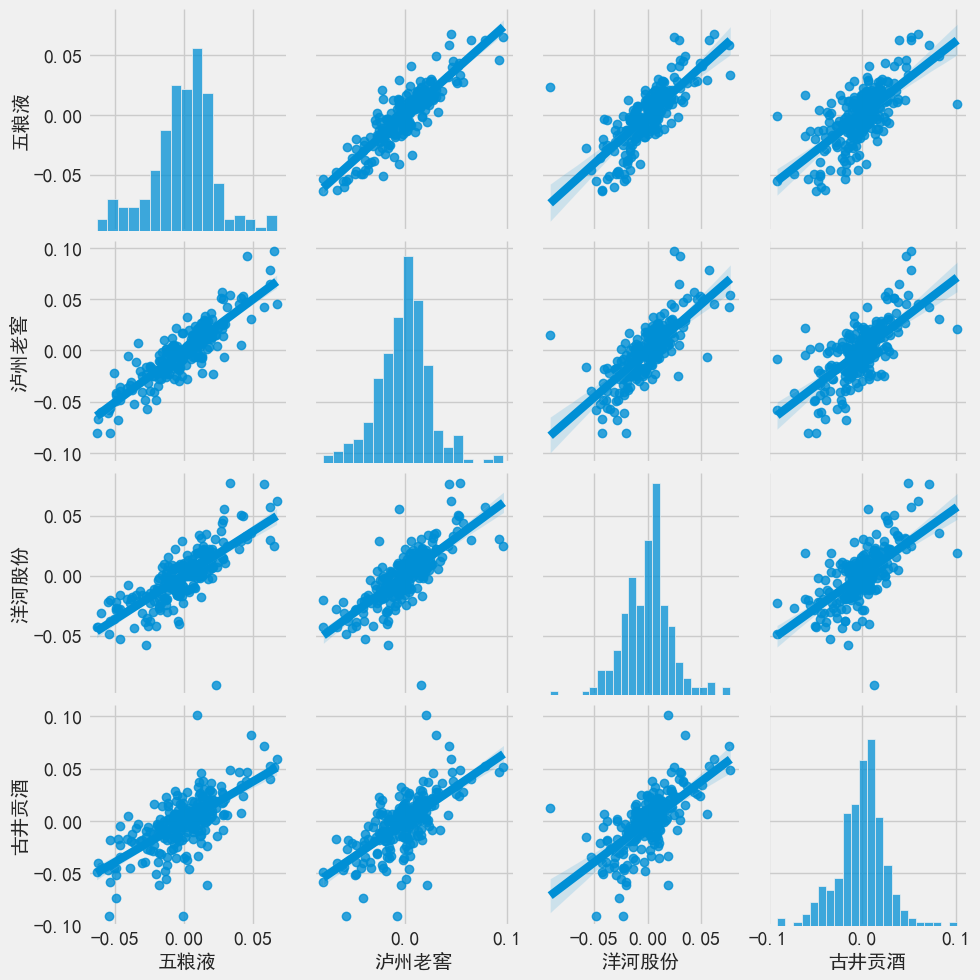

In [12]:
# simply call pairplot on the dataframe for an automatic visual analysis of all the comparisions
sns.pairplot(daily_rets, kind='reg')

use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle and the lower triangle

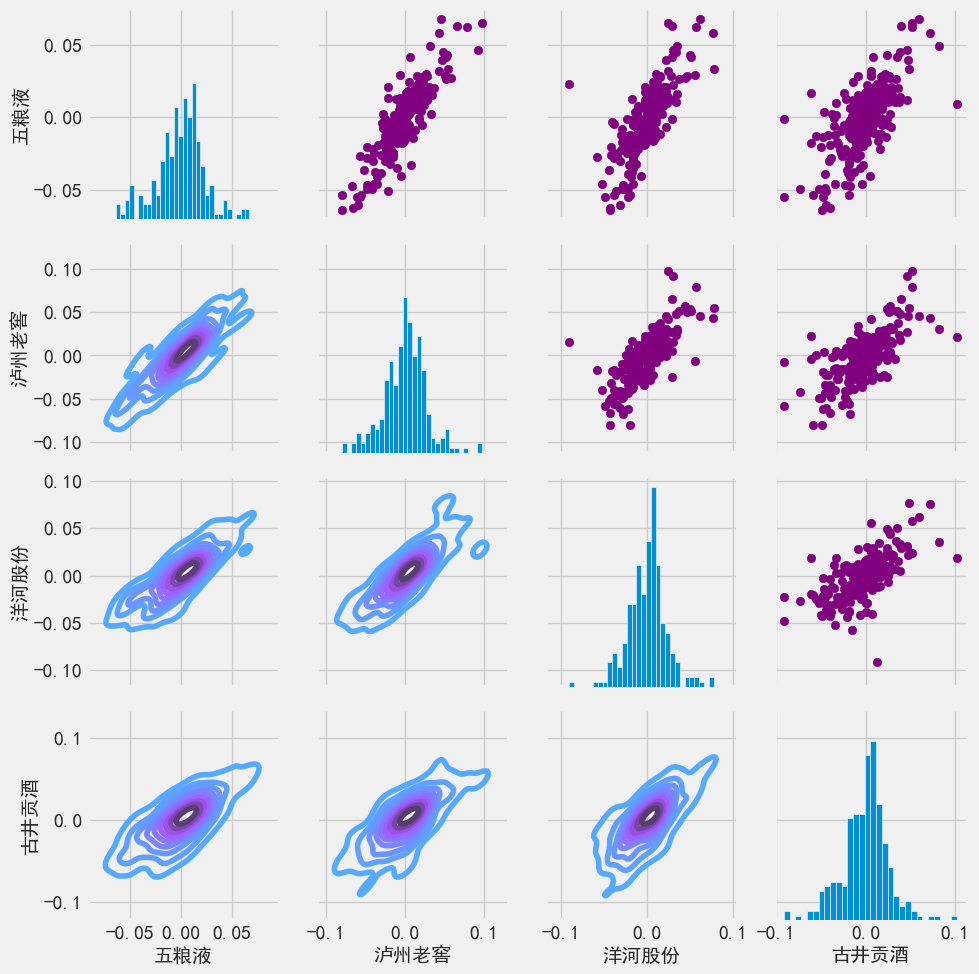

In [13]:
# set up figure byb naming it returns_fig, call PairPlot on the dataframe
return_fig = sns.PairGrid(daily_rets.dropna())

# use map_upper specify the upper triangle
return_fig.map_upper(plt.scatter, color='purple')

# define the lower triangle in the figure, including the plot type (kde) or the color map (bluepurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

correlation plot -- to get actual numerical values for the correlation between the stocks' daily return values

Text(0.5, 1.0, '股票间收盘价的相关性')

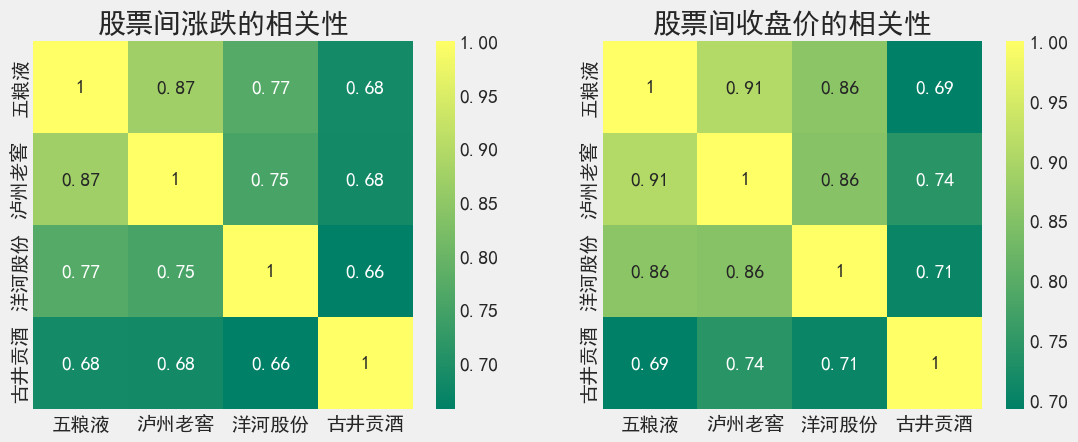

In [14]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(daily_rets.corr(), annot=True, cmap='summer')
plt.title('股票间涨跌的相关性')

plt.subplot(2, 2, 2)
sns.heatmap(close_df.corr(), annot=True, cmap='summer')
plt.title('股票间收盘价的相关性')

## Predicting the Closing Price Stock Price of 古井贡酒

In [29]:
# get the stock quote and show the data
# 取十年的时间长度（250个交易日一年）
df = stock_dict['GJGJ'][1]
df = df[:2500].iloc[::-1]
df = df.reset_index(drop=True)
df

,date,ts_code,open,high,low,close,pre_close,vol,amount,turn,paused,pct_chg,isST,MA for 10 days,MA for 20 days,MA for 50 days,daily return
0,2012-11-27,sz.000596,25.595960,25.891815,25.210452,25.300105,25.748370,1437007,4.092282e+07,0.374612,0,-1.7409,0,23.660350,24.665361,28.194824,0.024691
1,2012-11-28,sz.000596,25.300105,25.300105,24.564949,24.690464,25.300105,1354635,3.750375e+07,0.353138,0,-2.4096,0,23.530353,24.742911,28.261167,-0.003257
2,2012-11-29,sz.000596,24.762186,25.443550,24.555984,24.771152,24.690464,938131,2.619703e+07,0.244560,0,0.3268,0,23.490009,24.894425,28.309939,0.003632
3,2012-11-30,sz.000596,24.771152,24.977354,24.340817,24.681498,24.771152,826959,2.270444e+07,0.215579,0,-0.3619,0,23.388701,25.117212,28.356917,0.110977
4,2012-12-03,sz.000596,24.564949,24.591845,22.216038,22.216038,24.681498,3054972,7.771197e+07,0.796397,0,-9.9891,0,23.338495,25.404999,28.397619,-0.010778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2023-03-07,sz.000596,276.490000,279.490000,271.100000,272.590000,276.900000,1035233,2.848993e+08,0.253400,0,-1.5565,0,NaN,NaN,NaN,0.018800
2496,2023-03-08,sz.000596,270.150000,271.680000,265.800000,267.560000,272.590000,1056207,2.830706e+08,0.258500,0,-1.8453,0,NaN,NaN,NaN,-0.017335
2497,2023-03-09,sz.000596,267.710000,276.500000,267.710000,272.280000,267.560000,1521866,4.142701e+08,0.372500,0,1.7641,0,NaN,NaN,NaN,0.002688
2498,2023-03-10,sz.000596,269.000000,275.450000,268.000000,271.550000,272.280000,1124048,3.056653e+08,0.275100,0,-0.2681,0,NaN,NaN,NaN,-0.031562


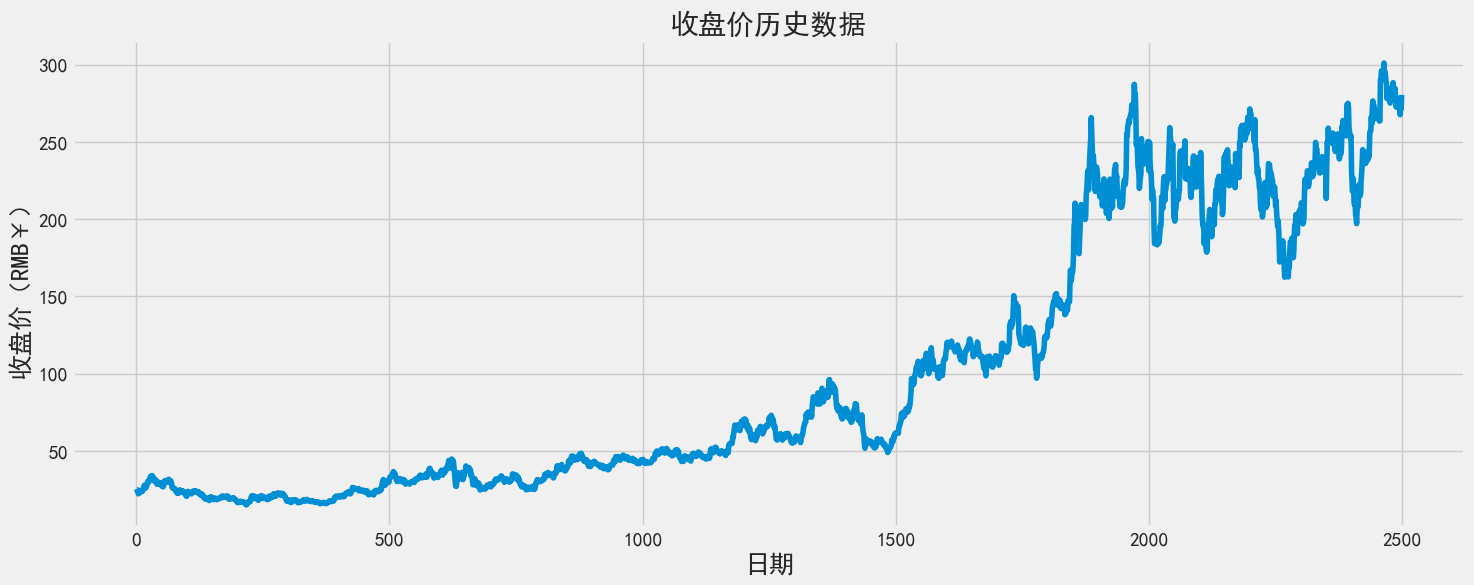

In [30]:
plt.figure(figsize=(16,6))
plt.title('收盘价历史数据')
plt.plot(df['close'])
plt.xlabel('日期', fontsize=18)
plt.ylabel('收盘价（RMB￥）', fontsize=18)
plt.show()

In [31]:
# creat a new dataframe with only the close column
data = df.filter(['close'])

# convert the dataframe to a numpy array
dataset = data.values

# get the number of rows to train the model on
train_data_len = int(np.ceil(len(dataset) * .95))

train_data_len

2375

In [32]:
# scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03585395],
       [0.03372198],
       [0.03400415],
       ...,
       [0.89956371],
       [0.89701084],
       [0.92796004]])

In [35]:
# create the scaled training data set
train_data = scaled_data[0:int(train_data_len), :]

# split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# convert teh x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.03585395, 0.03372198, 0.03400415, 0.03369063, 0.02506871,
       0.02591522, 0.02644821, 0.02748284, 0.02858018, 0.03042997,
       0.03130784, 0.03231112, 0.03046133, 0.03193489, 0.03829944,
       0.03939678, 0.04453858, 0.04309637, 0.04190497, 0.03823674,
       0.04127792, 0.04431911, 0.04958632, 0.05381891, 0.05485354,
       0.051781  , 0.05356809, 0.06055968, 0.06432198, 0.06369493,
       0.06306788, 0.06632853, 0.06557608, 0.06181378, 0.06137485,
       0.05924288, 0.05347403, 0.05601358, 0.05704821, 0.0543519 ,
       0.05084042, 0.04673325, 0.04842628, 0.051781  , 0.04899063,
       0.04958632, 0.04613755, 0.05046419, 0.04895927, 0.04817546,
       0.04745436, 0.04224985, 0.0422185 , 0.04080764, 0.04284555,
       0.05240804, 0.05162423, 0.05513571, 0.05372485, 0.05174964])]
[0.05159288103979887]

[array([0.03585395, 0.03372198, 0.03400415, 0.03369063, 0.02506871,
       0.02591522, 0.02644821, 0.02748284, 0.02858018, 0.03042997,
       0.03130784, 0.03231112, 0.03

(2315, 60, 1)

In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# build teh LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))

# complie the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model 
model.fit(x_train, y_train, batch_size=1, epochs=1)

NameError: name 'x_train' is not defined

In [39]:
# create the testing data set (scaled values from the remain index)
test_data = scaled_data[train_data_len - 60: , :]

# create the data sets x_test and y_test
x_test = []
y_test = dataset[train_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# convert the data to a numpy array
x_test = np.array(x_test)

# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 [==============================] - 0s 10ms/step


10.411643989099872

C:\Users\jim_c\AppData\Local\Temp\ipykernel_18948\2769567684.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


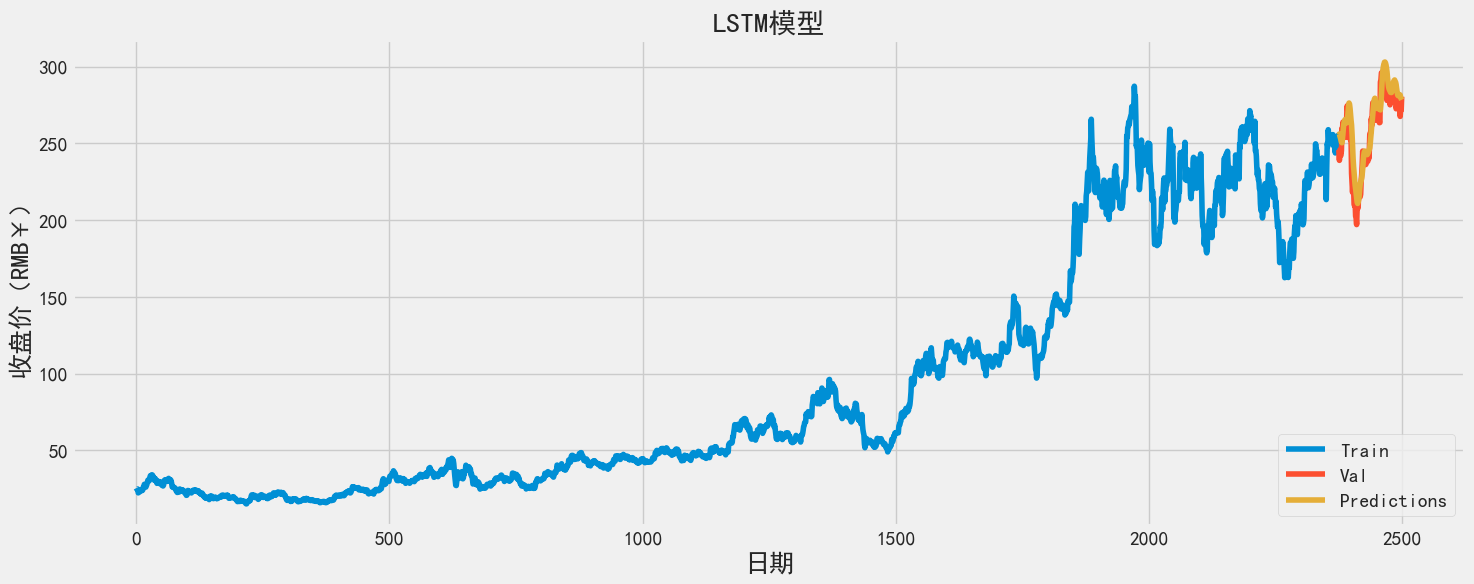

In [41]:
# plot the data
train = data[:train_data_len]
valid = data[train_data_len:]
valid['predictions'] = predictions

# visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM模型')
plt.xlabel('日期', fontsize=18)
plt.ylabel('收盘价（RMB￥）', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [42]:
# show the valid and predicted prices
valid

,close,predictions
2375,245.67,255.534882
2376,238.91,256.132874
2377,245.69,254.636505
2378,242.74,253.512634
2379,242.17,252.171295
...,...,...
2495,272.59,281.759186
2496,267.56,281.459412
2497,272.28,279.987152
2498,271.55,279.041321


In [44]:
# t-test for predictiosn
from scipy import stats
import scipy.stats

t, p_value = scipy.stats.ttest_ind(valid['close'], valid['predictions'])
print(t, p_value)

-1.787013874707053 0.07515649655899298


In [45]:
# t-test for navie model
t, p_value = scipy.stats.ttest_ind(valid['close'][1:], valid['close'][:len(valid['close']) - 1])
print(t, p_value)

0.08691900631569534 0.9308065992500472
